In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ejercicio 8.1 Low Pass Filter

In [3]:
def RK4(f,a,b,N,x0):
    h = (b-a)/N #nuestro paso macabro
    tpoints = np.arange(a,b,h) #el arreglo del tiempo
    xpoints = [] #arreglo de las x, bien podemos generalizar esto, porque si, lo vamos a usar para
    #más variables
    x = x0 #nuestras condiciones inciales, que igual, van a a aumentar XD
    for t in tpoints:
        #Hola, soy Runge Kutta 4: Salvation, y esta es mi historia...
        xpoints.append(x)
        k1 = h * f(x,t)
        k2 = h * f(x + 0.5*k1, t+0.5*h)
        k3 = h * f(x + 0.5*k2, t+0.5*h)
        k4 = h * f(x+k3, t + h)
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, tpoints #hay un desorden con los tpoints. Ups,spoiler alert!
#Usamos la convención del Newmann (como le llama a las cosas pues, Nomenclatura :O, ácido desoxirribonucleico)

In [4]:
#Lit la definicón de como es la función.
def V_in(t):
    #Usamos floor porque ya no estamos para andar construyendo funciones.
    if np.floor(2*t) % 2 == 0:
        return 1
    else:
        return -1
#Si, podria ser solo la x, pero bro, me reconfundio la V.
#La RC porque vamos a llamarla para diferentes.
def f(V,t, RC):
    return (V_in(t) - V) / RC

In [5]:
a = 0.0 #inicio del intervalo
b = 10.0 #final del intervalo
N = 1000 #numero de pasos
x0 = 0.0 #condicion inicial

In [6]:
def WachinangoRK4(f,a,b,N,x0,RC):
#la única modificación que sufrio la función fue que ahora la f consume RC. #Noalasdrogas
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    x = x0
    for t in tpoints:
        xpoints.append(x)
        k1 = h * f(x,t,RC)
        k2 = h * f(x + 0.5*k1, t+0.5*h,RC)
        k3 = h * f(x + 0.5*k2, t+0.5*h,RC)
        k4 = h * f(x+k3, t + h,RC)
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints

NameError: name 'h' is not defined

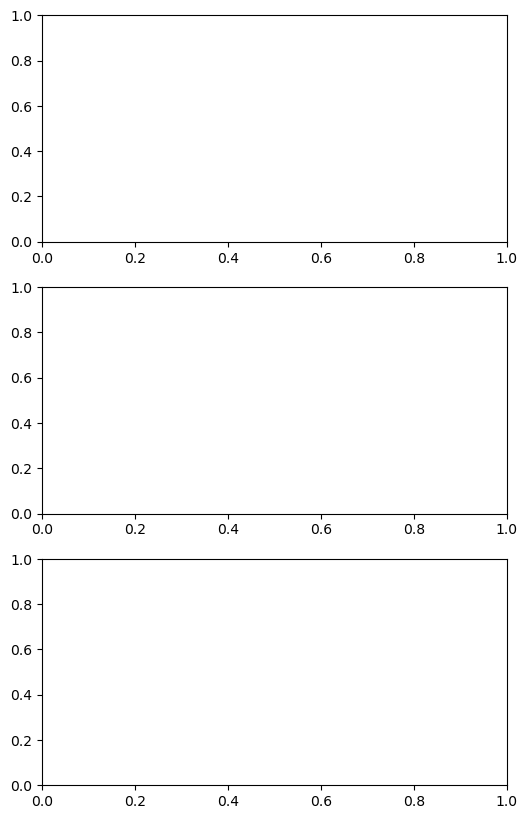

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
RCs = [0.01, 0.1, 1]
colors = plt.get_cmap('tab10').colors 
tpoints = np.arange(a,b,h)

for i, color in zip(range(3), colors):
    xpoints = WachinangoRK4(f,a,b,N,x0,RCs[i])
    axs[i].plot(tpoints, xpoints, label = f"RC = {RCs[i]}", color=color)
    axs[i].set_title(f"V vs t for RC = {RCs[i]}")
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("V")
    axs[i].legend()
plt.tight_layout() 


In [ ]:
#Ejercicio 8.2 Lotka-Volterra

In [ ]:
#Como lo dijo Niuman bb, podemos hacer todo más fácil con un arreglo.
def f(r,t,a,b,c,d):
    x = r[0]
    y = r[1]
    fx = a*x - b*x*y
    fy = c*x*y - d*y
    return np.array([fx,fy],float)

In [ ]:
a = 1.0
b = 0.5
c = 0.5
d = 2.0
r = np.array([2.0,2.0],float)
t0 = 0.0
tf = 30.0
N = 1000

In [ ]:
#Cada vez que corre un código no óptimo un gatito muere.
def WachinangoRK4(f,r,a,b,c,d,t0,tf,N):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    xpoints = []
    ypoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h * f(r,t,a,b,c,d)
        k2 = h * f(r + 0.5*k1, t+0.5*h,a,b,c,d)
        k3 = h * f(r + 0.5*k2, t+0.5*h,a,b,c,d)
        k4 = h * f(r+k3, t + h,a,b,c,d)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, ypoints, tpoints

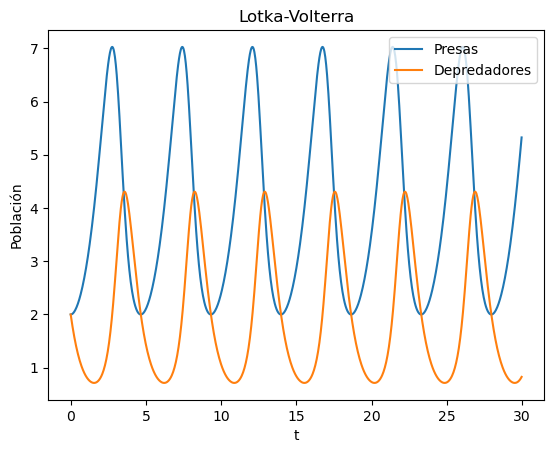

In [ ]:
xpoints, ypoints,tpoints2 = WachinangoRK4(f,r,a,b,c,d,t0,tf,N)
plt.plot(tpoints2,xpoints, label = "Presas")
plt.plot(tpoints2,ypoints, label = "Depredadores")
plt.title("Lotka-Volterra")
plt.legend()
plt.xlabel("t")
plt.ylabel("Población")
plt.show()

In [ ]:
# 8.3 Lorenz Equation

In [ ]:
#Dato curioso: A mi hermana le llamo 'Rataza'.
sigma = 10.0
rho = 28.0
beta = 8.0/3
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = rho*x - y - x*z
    fz = x*y - beta*z
    return np.array([fx,fy,fz],float)

t0 = 0.0
tf = 50.0
N = 10000
r = np.array([0.0,1.0,0.0],float)

In [ ]:
def WachinangoRK4(f,r,t0,tf,N):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    xpoints = []
    ypoints = []
    zpoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = h * f(r,t)
        k2 = h * f(r + 0.5*k1, t+0.5*h)
        k3 = h * f(r + 0.5*k2, t+0.5*h)
        k4 = h * f(r+k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, ypoints, zpoints, tpoints

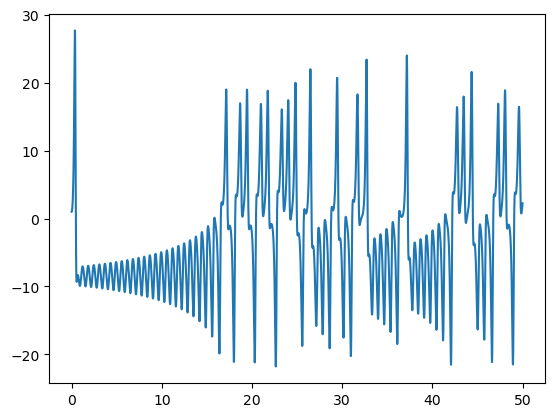

In [ ]:
xpoints3, ypoints3, zpoints3, tpoints3 = WachinangoRK4(f,r,t0,tf,N)
plt.plot(tpoints3,ypoints3)
plt.show()


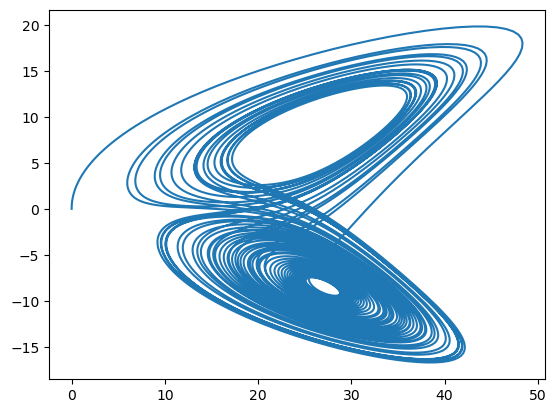

In [ ]:
plt.plot(zpoints3,xpoints3)
plt.show()

In [ ]:
# 8.4 Pendulum

In [ ]:
g = 9.81
l =0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*np.sin(theta)
    return np.array([ftheta,fomega],float)

t0 = 0.0
tf = 10.0
N = 3000
r = np.array([179/180*np.pi,0],float)


In [ ]:
def WachinangoRK4(f,r,t0,tf,N):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    thetapoints = []
    #omegapoints = []
    for t in tpoints:
        thetapoints.append(r[0])
        #omegapoints.append(r[1])
        k1 = h * f(r,t)
        k2 = h * f(r + 0.5*k1, t+0.5*h)
        k3 = h * f(r + 0.5*k2, t+0.5*h)
        k4 = h * f(r+k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return thetapoints,tpoints,#omegapoints

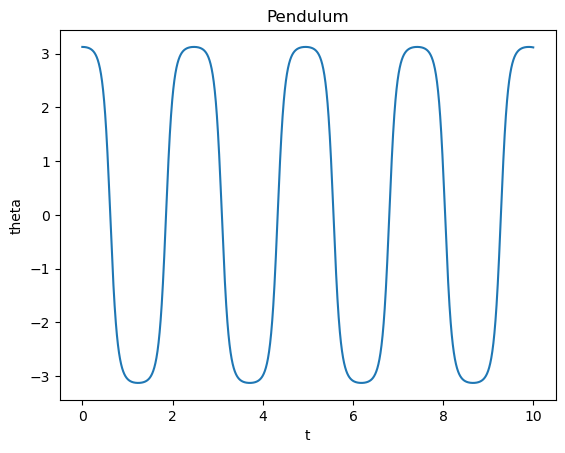

In [ ]:
thetapoints4, tpoints4 = WachinangoRK4(f,r,t0,tf,N)
plt.plot(tpoints4,thetapoints4)
plt.xlabel("t")
plt.ylabel("theta")
plt.title("Pendulum")
plt.show()